In [1]:
#Setting up the Environment:
# To read data and numerical calculation:
import numpy as np
import pandas as pd
import os
#import Splitfolders

#Graph plotting libaries:
import matplotlib.pyplot as plt
import seaborn as sns

# Model Packages:
import tensorflow
import keras

#Preprocessing packages:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

#Resnet50 packages:
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D,GlobalAveragePooling2D,Flatten,Dense,Dropout,BatchNormalization,Activation
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.models import load_model

In [2]:
#' ' means CPU whereas '/device:G:0' means GPU
import tensorflow 
tensorflow.test.gpu_device_name()

''

In [3]:
!nvidia-smi

Sat May 13 18:39:22 2023       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 531.79                 Driver Version: 531.79       CUDA Version: 12.1     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                      TCC/WDDM | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf            Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  NVIDIA GeForce MX130          WDDM | 00000000:01:00.0 Off |                  N/A |
| N/A    0C    P0               N/A /  N/A|      0MiB /  2048MiB |      1%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [4]:
path=r"C:\Users\prana\OneDrive\Desktop\Multi-class\Brain Tumour detection\Raw_Dataset\Raw Datasets"
training_dir=os.listdir(path)
print("Number of classes:",len(os.listdir(path)))
print(os.listdir(path))

Number of classes: 5
['cerebrovascular brain', 'Degenerative disease', 'Inflammatory Disease', 'Neoplastic Disease', 'Normal brain']


In [5]:
train_datagen=ImageDataGenerator(rescale=1/255,rotation_range=40,width_shift_range=[0,0.1],horizontal_flip=True,shear_range=0.02,height_shift_range=[0,0.1],fill_mode='nearest')
valid_datagen=ImageDataGenerator(rescale=1/255)
test_datagen=ImageDataGenerator(rescale=1/255)

In [6]:
train_dataset=train_datagen.flow_from_directory(directory=r"C:\Users\prana\OneDrive\Desktop\Multi-class\Brain Tumour detection\Data augumented  & vgg-16\Data augumented\train",target_size=(224,224),batch_size=20,shuffle=True,subset='training',color_mode='rgb',class_mode='categorical',seed=21)
valid_dataset=valid_datagen.flow_from_directory(directory=r"C:\Users\prana\OneDrive\Desktop\Multi-class\Brain Tumour detection\Data augumented  & vgg-16\Data augumented\val",target_size=(224,224),batch_size=20,shuffle=True,color_mode='rgb',class_mode='categorical',seed=21)
test_dataset=test_datagen.flow_from_directory(directory=r"C:\Users\prana\OneDrive\Desktop\Multi-class\Brain Tumour detection\Data augumented  & vgg-16\Data augumented\test",target_size=(224,224),batch_size=1,shuffle=False,class_mode=None,seed=21)

Found 3936 images belonging to 5 classes.
Found 490 images belonging to 5 classes.
Found 496 images belonging to 5 classes.


In [7]:
model=ResNet50()

model.summary()

Model: "resnet50"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 230, 230, 3)  0           ['input_1[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 112, 112, 64  9472        ['conv1_pad[0][0]']              
                                )                                                                 
                                                                                           

                                                                                                  
 conv2_block3_1_relu (Activatio  (None, 56, 56, 64)  0           ['conv2_block3_1_bn[0][0]']      
 n)                                                                                               
                                                                                                  
 conv2_block3_2_conv (Conv2D)   (None, 56, 56, 64)   36928       ['conv2_block3_1_relu[0][0]']    
                                                                                                  
 conv2_block3_2_bn (BatchNormal  (None, 56, 56, 64)  256         ['conv2_block3_2_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv2_block3_2_relu (Activatio  (None, 56, 56, 64)  0           ['conv2_block3_2_bn[0][0]']      
 n)       

                                                                                                  
 conv3_block3_1_relu (Activatio  (None, 28, 28, 128)  0          ['conv3_block3_1_bn[0][0]']      
 n)                                                                                               
                                                                                                  
 conv3_block3_2_conv (Conv2D)   (None, 28, 28, 128)  147584      ['conv3_block3_1_relu[0][0]']    
                                                                                                  
 conv3_block3_2_bn (BatchNormal  (None, 28, 28, 128)  512        ['conv3_block3_2_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv3_block3_2_relu (Activatio  (None, 28, 28, 128)  0          ['conv3_block3_2_bn[0][0]']      
 n)       

                                                                                                  
 conv4_block2_1_bn (BatchNormal  (None, 14, 14, 256)  1024       ['conv4_block2_1_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv4_block2_1_relu (Activatio  (None, 14, 14, 256)  0          ['conv4_block2_1_bn[0][0]']      
 n)                                                                                               
                                                                                                  
 conv4_block2_2_conv (Conv2D)   (None, 14, 14, 256)  590080      ['conv4_block2_1_relu[0][0]']    
                                                                                                  
 conv4_block2_2_bn (BatchNormal  (None, 14, 14, 256)  1024       ['conv4_block2_2_conv[0][0]']    
 ization) 

 conv4_block5_1_conv (Conv2D)   (None, 14, 14, 256)  262400      ['conv4_block4_out[0][0]']       
                                                                                                  
 conv4_block5_1_bn (BatchNormal  (None, 14, 14, 256)  1024       ['conv4_block5_1_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv4_block5_1_relu (Activatio  (None, 14, 14, 256)  0          ['conv4_block5_1_bn[0][0]']      
 n)                                                                                               
                                                                                                  
 conv4_block5_2_conv (Conv2D)   (None, 14, 14, 256)  590080      ['conv4_block5_1_relu[0][0]']    
                                                                                                  
 conv4_blo

                                                                  'conv5_block1_3_bn[0][0]']      
                                                                                                  
 conv5_block1_out (Activation)  (None, 7, 7, 2048)   0           ['conv5_block1_add[0][0]']       
                                                                                                  
 conv5_block2_1_conv (Conv2D)   (None, 7, 7, 512)    1049088     ['conv5_block1_out[0][0]']       
                                                                                                  
 conv5_block2_1_bn (BatchNormal  (None, 7, 7, 512)   2048        ['conv5_block2_1_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv5_block2_1_relu (Activatio  (None, 7, 7, 512)   0           ['conv5_block2_1_bn[0][0]']      
 n)       

In [8]:
len(model.layers)

177

In [9]:
model=ResNet50(input_shape=(224,224,3),include_top=False,weights='imagenet')

model.trainable=False

#for layer in model.layers[:100]:
    #layer.trainable = False

In [10]:
tensorflow.random.set_seed(21)

model=tensorflow.keras.models.Sequential([model,
                                         tensorflow.keras.layers.GlobalAveragePooling2D(),
                                         tensorflow.keras.layers.BatchNormalization(),
                                         tensorflow.keras.layers.Dense(512,activation="relu"),
                                         tensorflow.keras.layers.Dropout(0.5),
                                         tensorflow.keras.layers.BatchNormalization(),
                                         tensorflow.keras.layers.Dense(256,activation="relu"),
                                         tensorflow.keras.layers.BatchNormalization(),
                                         tensorflow.keras.layers.Dense(128,activation="relu"),
                                         tensorflow.keras.layers.Dense(5,activation="softmax")])
model.summary()



Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50 (Functional)       (None, 7, 7, 2048)        23587712  
                                                                 
 global_average_pooling2d (G  (None, 2048)             0         
 lobalAveragePooling2D)                                          
                                                                 
 batch_normalization (BatchN  (None, 2048)             8192      
 ormalization)                                                   
                                                                 
 dense (Dense)               (None, 512)               1049088   
                                                                 
 dropout (Dropout)           (None, 512)               0         
                                                                 
 batch_normalization_1 (Batc  (None, 512)              2

In [11]:
opt=Adam(learning_rate=1e-5)

model.compile(optimizer=opt,loss='categorical_crossentropy',metrics=['accuracy'])

In [12]:
# batch_size=20

# history=model.fit(train_dataset,steps_per_epoch=train_dataset.n//batch_size,validation_data=valid_dataset,validation_steps=valid_dataset.n//batch_size, epochs=200)

In [13]:
#model.save(r"C:\Users\prana\OneDrive\Desktop\Multi-class\Brain Tumour detection\ResNet-50 & AlexNet\Models\model = load_model(r'C:\Users\prana\OneDrive\Desktop\Multi-class\Brain Tumour detection\ResNet-50 & AlexNet\Models\ResNet50.h5')")

In [14]:
# plt.subplot(211)
# plt.plot(history.history['accuracy'])
# plt.plot(history.history['val_accuracy'])
# plt.title('model_accuracy')
# plt.ylabel('Accuracy')
# plt.xlabel('epoch')
# plt.legend(['train','val'],loc='upper left')

# plt.subplot(212)
# plt.plot(history.history['loss'])
# plt.plot(history.history['val_loss'])
# #plt.title('Base_model_accuracy')
# plt.ylabel('loss')
# plt.xlabel('epoch')
# plt.legend(['train','val'],loc='upper left')
# plt.show()

In [15]:
model = load_model(r'C:\Users\prana\OneDrive\Desktop\Multi-class\Brain Tumour detection\ResNet-50 & AlexNet\Models\ResNet50.h5')

In [16]:
model_new=model
accuracy_score = model_new.evaluate(train_dataset)
print(accuracy_score)
print("Accuracy: {:.4f}%".format(accuracy_score[1] * 100))
 
print("Loss: ",accuracy_score[0])

197/197 [==============================] - 331s 2s/step - loss: 0.6187 - accuracy: 0.7698
[0.6186763644218445, 0.769817054271698]
Accuracy: 76.9817%
Loss:  0.6186763644218445


In [17]:
accuracy_score = model_new.evaluate(valid_dataset)
print(accuracy_score)
print("Accuracy: {:.4f}%".format(accuracy_score[1] * 100))

print("Loss: ",accuracy_score[0])

25/25 [==============================] - 40s 2s/step - loss: 0.4700 - accuracy: 0.8204
[0.4700372815132141, 0.8204081654548645]
Accuracy: 82.0408%
Loss:  0.4700372815132141


In [18]:
predictions_model=[]
from sklearn.metrics import confusion_matrix,classification_report,ConfusionMatrixDisplay
test_labels=test_dataset.classes
for i in range(0,test_dataset.n):
    predictions=model_new.predict(test_dataset[i])
    predictions=np.argmax(predictions)
    predictions_model.append(predictions)
#rint(predictions,np.argmax(predictions))
#=np.argmax(predictions);
#redictions_model.append(s)
print(classification_report(test_labels,predictions_model))

1/1 [==============================] - 0s 187ms/step


1/1 [==============================] - 0s 218ms/step


1/1 [==============================] - 0s 182ms/step


1/1 [==============================] - 0s 109ms/step
              precision    recall  f1-score   support

           0       0.76      0.85      0.80        82
           1       0.66      0.59      0.63        69
           2       0.66      0.66      0.66        58
           3       0.95      0.98      0.97       172
           4       0.81      0.77      0.79       115

    accuracy                           0.82       496
   macro avg       0.77      0.77      0.77       496
weighted avg       0.81      0.82      0.81       496



In [19]:
confusion_matrix(test_labels,predictions_model)

array([[ 70,   3,   0,   4,   5],
       [ 10,  41,  10,   3,   5],
       [  1,   8,  38,   1,  10],
       [  0,   4,   0, 168,   0],
       [ 11,   6,  10,   0,  88]], dtype=int64)

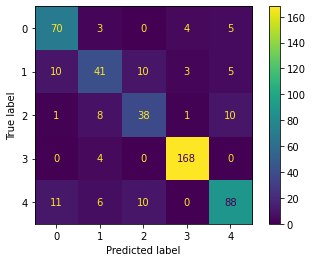

In [20]:
confusion_matrix(test_labels,predictions_model)

cm_display = ConfusionMatrixDisplay(confusion_matrix = confusion_matrix(test_labels,predictions_model),display_labels=np.unique(test_dataset.classes))
cm_display.plot()
plt.show()

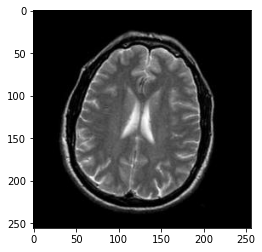

In [21]:
from skimage.io import imread
from skimage import transform
I_test=imread(r'C:\Users\prana\OneDrive\Desktop\Multi-class\Brain Tumour detection\Data augumented  & vgg-16\Data augumented\test\Inflammatory Disease\Inflammatory Disease (13).jpg')
plt.imshow(I_test)

In [22]:
I_test=np.array(I_test).astype('float32')/255
I_test=transform.resize(I_test, (224, 224, 3))
I_test= np.expand_dims(I_test, axis=0)
I_test.shape

(1, 224, 224, 3)

In [23]:
predictions=model_new.predict(I_test)
predictions=np.argmax(predictions)
print(predictions)

1/1 [==============================] - 0s 111ms/step
1


In [24]:
num_classes_train = len(train_dataset.class_indices)
class_names_train = list(train_dataset.class_indices.keys())
print("Number of classes in the training dataset:", num_classes_train)
print("Class names in the training dataset:", class_names_train)

Number of classes in the training dataset: 5
Class names in the training dataset: ['Degenerative disease', 'Inflammatory Disease', 'Neoplastic Disease', 'Normal brain', 'cerebrovascular brain']
